<a href="https://colab.research.google.com/github/RamyaKGokul/Python_DataScience/blob/main/Statistics_and_Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics and Probability Distributions

##Imports + Google Drive

In [15]:
# Imports
import numpy as np
import math
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import scipy.stats as stats
import scipy.stats as ss
import seaborn as sns
import itertools
sns.set(style='ticks', palette='Set2')
%matplotlib inline

##Part 1: The Iris dataset

---
The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each:

sepal length in cm;
sepal width in cm;
petal length in cm; and
petal width in cm.
The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.


In [3]:
iris = sns.load_dataset("iris")
iris.head()
iris['species'].nunique()

3

##Histogram and summary statistics

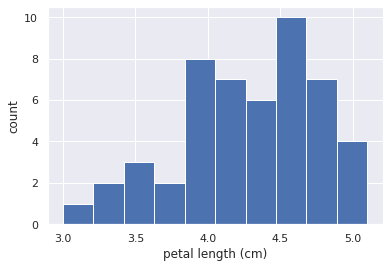

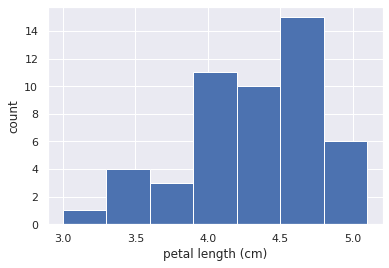

Versicolor petal length
Mean= 4.26
Standard Deviation= 0.47


Text(0, 0.5, 'petal length(cm)')

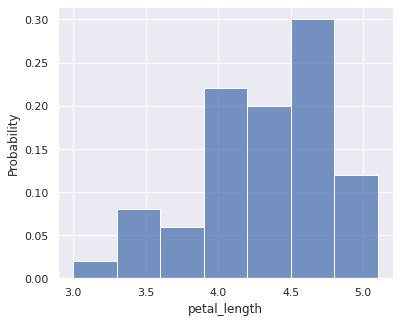

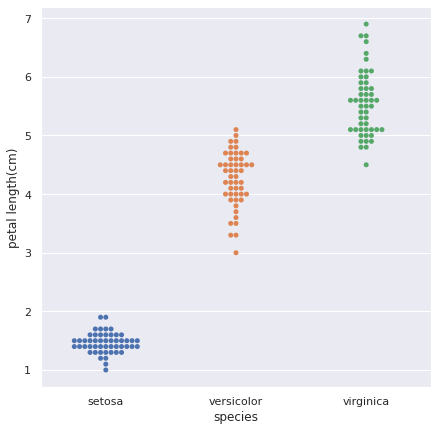

In [4]:
# Set default Seaborn style
sns.set()
# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)
# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()
sns.set()
# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
x=len(versicolor_petal_length)
# Choosing number of bins using 'square root rule'
binsizes=int(math.sqrt(x))
plt.hist(versicolor_petal_length,bins=binsizes)
# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')
# Show histogram
plt.show()
# Plot histogram with y-axis showing probability
fig, ax = plt.subplots(figsize=(6, 5))
p = sns.histplot(data=versicolor_petal_length, stat='probability', ax=ax)
#Computing mean and standard deviation of versicolor petal length
print("Versicolor petal length\nMean= {:.2f}\nStandard Deviation= {:.2f}".format(versicolor_petal_length.mean(),versicolor_petal_length.std()))
# Swarm plot to compare species' petal length
plt.figure(figsize=(7, 7))
ax = sns.swarmplot(x='species', y='petal_length', data=iris)
# Setting y label
ax.set_ylabel('petal length(cm)')

##Empirical Cumulative Distribution Function (ECDF)

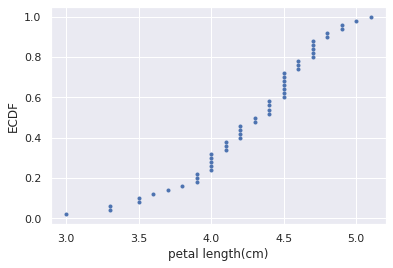

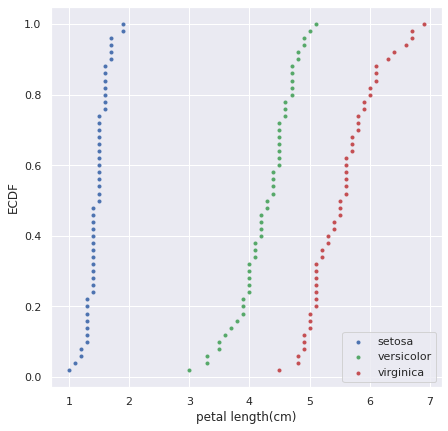

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
# Passing versicolor petal length data to ECDF function
pl,ecd=ecdf(versicolor_petal_length)
# Scatter plotting with marker '.'
plt.scatter(pl, ecd, marker='.')
# Setting x and y label
plt.xlabel('petal length(cm)')
plt.ylabel('ECDF')
# Function computing ECDF for all three species
def iris_ecdf():
    plt.figure(figsize=(7, 7))
# Computing uniques species  
    species = iris['species'].unique()
    colors = ['b', 'g', 'r']
# For loop extracting petal_lengths of each species and scatter plotting
    for s, c in zip(species, colors):
        petal_length = iris[iris.species == s].petal_length
        x, y = ecdf(petal_length)
        plt.scatter(x, y, marker='.', label=s, color=c)
# Assigning x and y labels
    plt.xlabel('petal length(cm)')
    plt.ylabel('ECDF')
    plt.legend()
# Calling iris_ecdf function to plot petal_length for each species in a single graph 
iris_ecdf()

##Percentiles

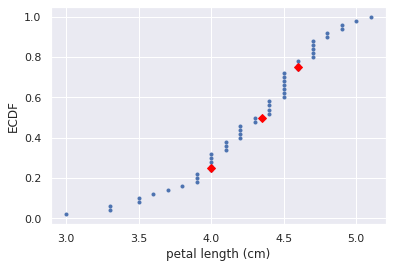

In [6]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
x_vers,y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

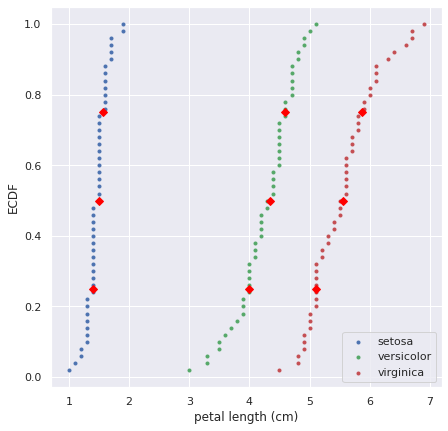

In [7]:
# Function computing ECDF for all three species
def iris_ecdf(show_percentiles=False):
    plt.figure(figsize=(7, 7))
    # Computing unique species 
    species=iris.species.unique()
    colors=['b','g','r']
    # For loop extracting petal_lengths of each species and scatter plotting
    for s, c in zip(species, colors):
        petal_length=iris[iris.species==s].petal_length
        x,y=ecdf(petal_length)
        #Plotting ECDF
        plt.scatter(x,y,marker='.',label=s,color=c)
        if show_percentiles:
            # Specify array of percentiles: percentiles
            percentiles=np.array([25,50,75])
            # Compute percentiles
            ptiles=np.percentile(petal_length, percentiles)
            # Overlay percentiles as red diamonds.
            plt.plot(ptiles, percentiles/100, marker='D', color='red',linestyle='none')
    # Assigning x and y labels
    plt.xlabel('petal length (cm)')
    plt.ylabel('ECDF')
    plt.legend() 
# Calling iris_ecdf function to plot petal_length for each species in a single graph    
iris_ecdf(True)

Text(0.5, 0, 'petal length(cm)')

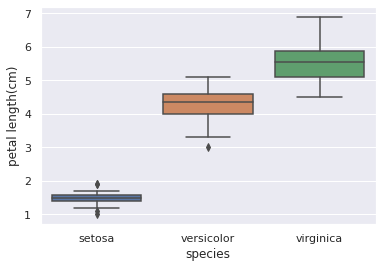

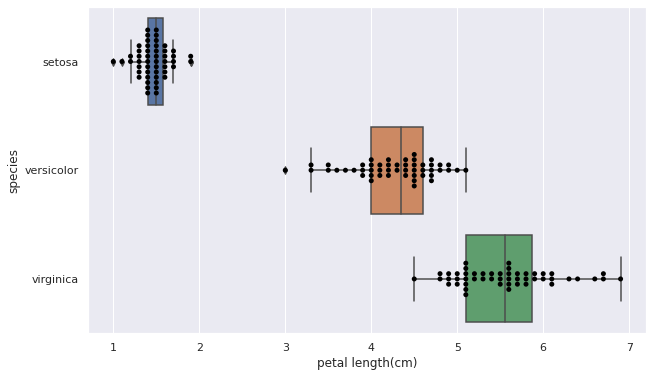

In [8]:
# Box plotting the petal lengths of each species
ax=sns.boxplot(x='species', y='petal_length', data=iris)
# Setting y label
ax.set_ylabel('petal length(cm)')
# Box plotting petal lengths for all the species
plt.figure(figsize=(10,6))
ax=sns.boxplot(x='petal_length',y='species',data=iris)
# Swarm plotting petal lengths over box plots
sns.swarmplot(x='petal_length',y='species',data=iris,color='black')
# Setting x label
plt.xlabel('petal length(cm)')

##Scatter plots, pair plots, and correlation between two variables

Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


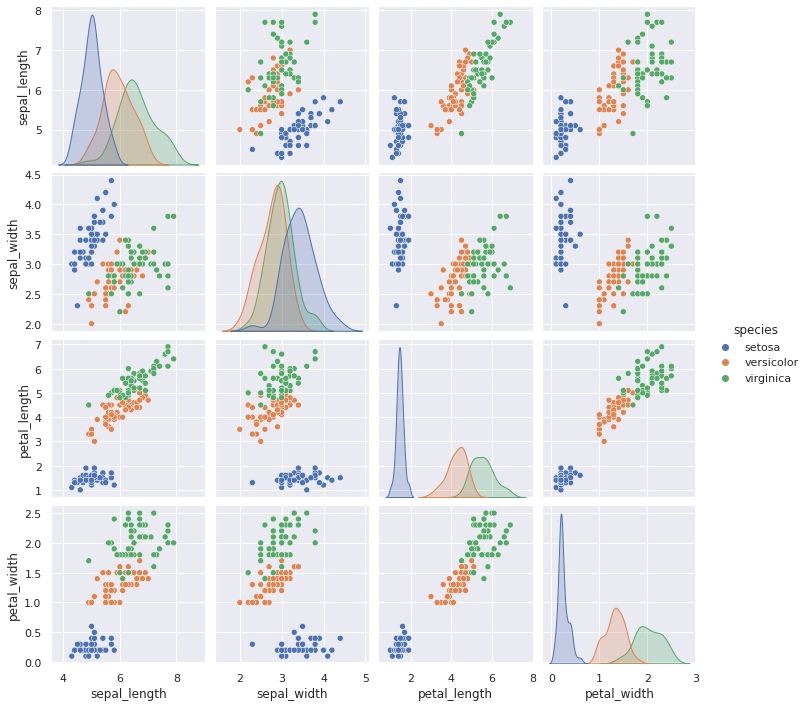

In [9]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

In [10]:
# Computing Pearson Correlation Co-efficient for all pair-wise combinations of all three species
def correlations(p_r):
    # Computing unique species  
    species=iris.species.unique()
    # Extracting specific data from iris dataset 
    data=list(iris[['sepal_length','sepal_width','petal_length','petal_width']])
    # Forming a dataframe with multiindex
    correlations=pd.DataFrame(index=pd.MultiIndex.from_product([species,data]),columns=data)
    # Pair-wise permutation of measurements
    data1=list(itertools.permutations(data, 2))
    print(data1)
    # Calculating correlation for each species
    for s in species:
        i_species=iris[iris.species==s]
        for p in data1:
            corr=pearson_r(i_species[p[0]], i_species[p[1]])
            correlations.loc[(s, p[0])][p[1]]=corr
    # Displaying the result in table format
    display(correlations.style.format(lambda x:'{:.2f}'.format(x) if str(x) else ''))
correlations(pearson_r)

[('sepal_length', 'sepal_width'), ('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_width', 'sepal_length'), ('sepal_width', 'petal_length'), ('sepal_width', 'petal_width'), ('petal_length', 'sepal_length'), ('petal_length', 'sepal_width'), ('petal_length', 'petal_width'), ('petal_width', 'sepal_length'), ('petal_width', 'sepal_width'), ('petal_width', 'petal_length')]


##Part 2: Empirical distributions vs. analytic distributions
The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

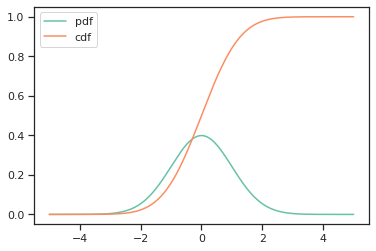

In [16]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

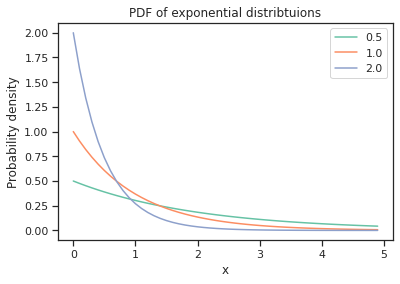

In [17]:
# List of Lambda values
lam=[0.5,1.0,2.0]
# Creating an 1D array
x=np.arange(0, 5, 0.1)
# Computing PDF
for i in lam:
    y=i*np.exp(-i*x)
    # Plotting
    plt.plot(x,y)
    # Setting title, x and y labels
    plt.title('PDF of exponential distribtuions')
    plt.xlabel('x')
    plt.ylabel('Probability density')
    plt.legend(lam)

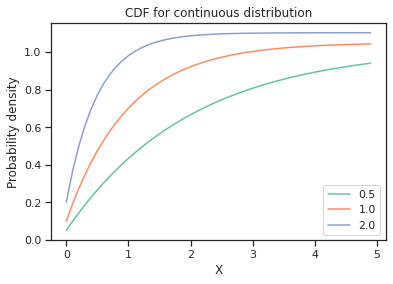

In [18]:
# List of lambda values
lam=[0.5,1.0,2.0]
# Creating an 1D array
x=np.arange(0, 5, 0.1)
# Computing CDF
for i in lam:
    y=i*np.exp(-i*x)
    cdf=np.cumsum(y)
    # Plotting
    plt.plot(x,cdf/10)
    # Setting title,x and y label
    plt.xlabel("X")
    plt.ylabel("Probability density")
    plt.title("CDF for continuous distribution")
    plt.legend(lam)

For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page. 

The code below:

computes mean and standard deviation of Belmont winners' times with the two outliers removed.
takes 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
plots the CDF of your samples with the ECDF, with labeled axes.

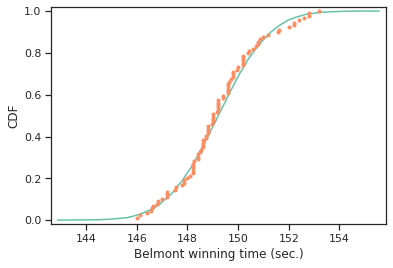

In [19]:
belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


###What are the chances of a horse matching or beating Secretariat's record?

In [20]:
# Declaring mu and sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)
# Creating samples array
data=np.random.normal(mu, sigma, 1000000)
# Computing sum of the values less than or equal to 144
lessthan144=np.sum(data<= 144)
# Printing the results
print('Total number of samples:{}\nSum of the samples less than or equal to 144s:{}\nFraction of samles less than 144s:{:.3%}'.format(len(data),lessthan144,lessthan144/len(data)))

Total number of samples:1000000
Sum of the samples less than or equal to 144s:593
Fraction of samles less than 144s:0.059%


##Part 3: Events over time
In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from babies_brisbane.csv (available here) containing information about the time of birth for 44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper.

Dataset
lambda=0.03007
mean=33.26
Sample dataset
lambda=0.03037
mean=32.92


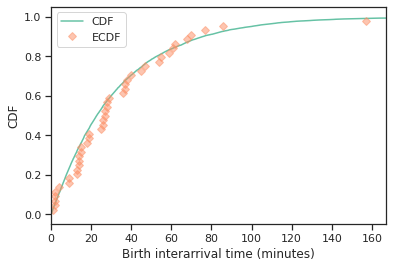

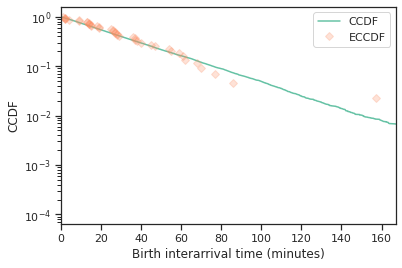

In [22]:
# Reading csv file
babies=pd.read_csv('https://raw.githubusercontent.com/ogemarques/data-files/main/babies_brisbane.csv')
babies.head(5)
# Computing interarrival time of a series of events
births_interarrival = babies['minutes'].diff()
births_interarrival.head(5)
# Computing and printing lambda and mean of interarrival data
lam=1/np.mean(births_interarrival)
print('Dataset\nlambda={:.5f}\nmean={:.2f}'.format(lam, np.mean(births_interarrival)))
# Creating sample data array
samples=np.random.exponential(1/lam,10000)
# Computing and printing lambda and mean of sample data
print('Sample dataset\nlambda={:.5f}\nmean={:.2f}'.format(1/np.mean(samples), np.mean(samples)))
# Computing ECDF for sample data
x_theor,y_theor=ecdf(samples)
# Computing ECDF for interarrival data
x, y=ecdf(births_interarrival)
# Plotting CDF
plt.plot(x_theor,y_theor,label='CDF')
# Overlaying ECDF over CDF graph
plt.plot(x, y,marker='D',linestyle='none',label='ECDF',alpha=0.5)
# Setting xlimit,x and y label
plt.xlim((0, np.max(births_interarrival)+10))
plt.xlabel('Birth interarrival time (minutes)')
plt.ylabel('CDF')
plt.legend()
plt.show()
# Plotting complementary CDF
plt.plot(x_theor,1-y_theor,label='CCDF')
# Overlaying ECCDF over CCDF graph
plt.plot(x,1-y,marker='D',linestyle='none',label='ECCDF',alpha=0.25)
# Setting y scale to log
plt.yscale('log')
# Setting xlimit,x and y label
plt.xlim((0, np.max(births_interarrival) + 10))
plt.xlabel('Birth interarrival time (minutes)')
plt.ylabel('CCDF')
plt.legend()
plt.show()